## 02 군집 평가(Cluster Evaluation)

In [1]:
# 군집화는 분류(Classification)와 유사해 보일 수 있으나 성격이 많이 다르다.

# 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 
# 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나
# 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.

# 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵지만,
# 실루엣 분석을 군집화 성능을 평가하는 대표적인 방법으로 사용한다.

### 실루엣 분석(silhouette analysis)의 개요

In [3]:
# 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.
# 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리(between)는 떨어져 있고,
# 동일 군집끼리의 데이터(within)는 서로 가깝게 잘 뭉쳐져 있다는 의미이다.
# 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것이다.

# 실루엣 분석은 실루옛 계수(silhouette coefficient)를 기반으로 한다.
# 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다.

# 개별 데이터가 가지는 실루엣 계수는, 
# 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집(within)되어 있고
# 다른 군집에 있는 데이터와는 얼마나 멀리 분리(between)되어 있는지를 나타내는 지표다.

# 특정 데이터 포인트의 실루엣 계수 값은, 
# 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i),
# 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산된다.
# 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이며,
# 이 값을 정규화 하기 위해 MAX(a(i), b(i)) 값으로 나눈다.

# s(i) = (b(i)-a(i)) / max(a(i), b(i))

# 실루옛 계수는 -1에서 1 사이의 값을 가지며,
# 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다.
# - 값은 아예 다른 군집에 데이터 포인트가 할당되었음을 뜻 한다.

# 좋은 군집화가 되려면 다음 기준을 만족해야 한다.
# 1. 전체 실루엣 계수의 평균값이 1에 가까울수록 좋다.
# 2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다.
#    즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.

### 붓꽃 데이터 세트를 이용한 군집 평가

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhoutte_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhoutte_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 silhouette Analysis Score:0.553


/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [7]:
# 군집별 평균 실루엣 계수 값을 알아보자.
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법 

In [8]:
# 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없다.
# 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어
# 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있따.
# 개별 군집별로 적당히 분리된 거리(between)를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우(within)에
# K-Means의 적절한 군집계수가 설정됐다고 판단할 수 있다.

In [17]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각 실루엣 계수를 면적으로 시각화한 함수 작성.
def visualize_silhouette(cluster_lists, X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력 값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 계수를 구함.
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster :'+str(n_cluster)+'\n' \
                         'Silhouette Score:' + str(round(sil_avg,3)))
        axs[ind].set_xlabel("the silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster +1) * 10])
        axs[ind].set_yticks([]) # Clear the y-axis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수 별로 fill_betweenx( ) 형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                  facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


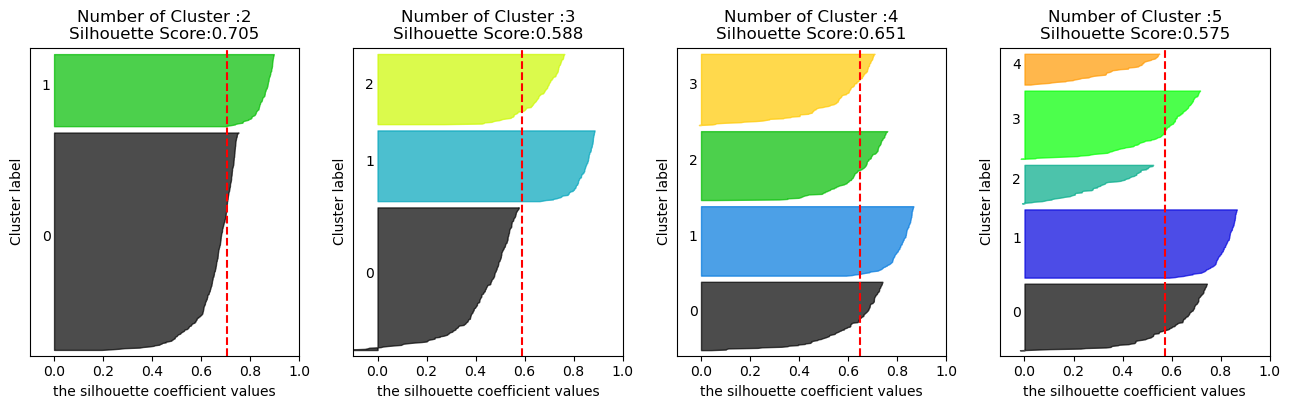

In [18]:
# make_blobs 을 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                 center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루옛 계수 평균값 시각화
visualize_silhouette([2, 3, 4, 5], X)

In [19]:
# 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치한 세 번째 그림(4개의 군집)이 가장 최적이 됨을 알 수 있다.

/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


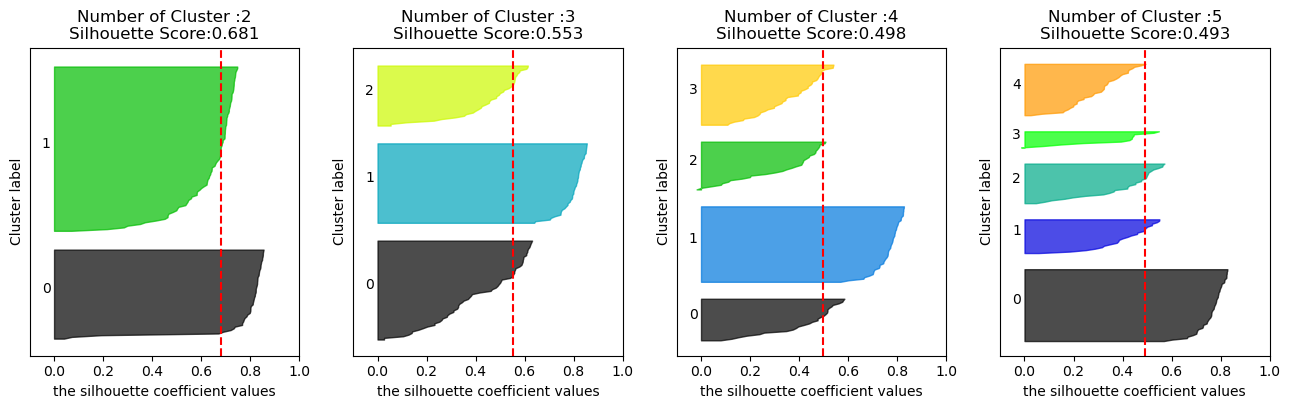

In [20]:
# 붓꽃 데이터를 이용해 K-Means 수행 시 최적의 군집 개수를 알아보자.
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

In [21]:
# K-Means으로 군집화 하 경우 군집 개수를 2개로 하는 것이 가장 좋아보인다.
# 3개의 경우 평균 실루엣 계수 값도 2개보다 작을 뿐더러 1번 군집과 0번, 2번 군집의 실루엣 계수의 편차가 크다.